# Linear Regression

In [33]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import cross_val_score, train_test_split, cross_validate
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [34]:
X_train = pd.read_csv('X_train.csv', index_col=0)
y_train = pd.read_csv('y_train.csv', index_col=0)
X_test = pd.read_csv('X_test.csv', index_col=0)
y_test = pd.read_csv('y_test.csv', index_col=0)


In [35]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Initialize Linear Regression model
model = LinearRegression()

model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

sfs_backward = SFS(model, 
                   k_features=10, 
                   forward=False, 
                   floating=False, 
                   scoring='neg_mean_squared_error',
                   cv=5)

sfs_backward = sfs_backward.fit(X_train, y_train)

# Selected Features
selected_features_backward = X_train.columns[list(sfs_backward.k_feature_idx_)]
print('Selected features in Backward Selection:', selected_features_backward)
print('Score',sfs_backward.k_score_)

pd.DataFrame.from_dict(sfs_backward.get_metric_dict()).T

Mean Absolute Error: 8.83321479806559
Mean Squared Error: 122.87931760735218
r2 score: 0.5801009239905257
Selected features in Backward Selection: Index(['PM2.5', 'Land_EQI', 'Sociod_EQI', 'PM10', 'CO', 'CS2', 'Water_EQI',
       'EQI', 'smoking_data', 'UCI_smoking'],
      dtype='object')
Score -135.85930118797012


,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
19,"(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[-144.25116376203678, -134.05403635676885, -11...",-137.472811,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",16.247771,12.641318,6.320659
18,"(0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11, 12, 13, 14...","[-144.3669063215545, -134.12292394681447, -116...",-137.159436,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, CLU50...",15.596952,12.134959,6.067479
17,"(0, 1, 2, 3, 5, 6, 7, 9, 10, 11, 12, 13, 14, 1...","[-143.91050535090918, -134.07231994302575, -11...",-136.917491,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.31619,11.916516,5.958258
16,"(0, 1, 2, 3, 5, 7, 9, 10, 11, 12, 13, 14, 15, ...","[-143.83342304785492, -134.08634395266947, -11...",-136.749576,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.176144,11.807556,5.903778
15,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16,...","[-143.47737410391233, -133.9319252602685, -116...",-136.556732,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",15.040693,11.70217,5.851085
14,"(0, 1, 2, 3, 5, 9, 10, 11, 12, 13, 14, 15, 16,...","[-142.44607565698502, -134.00643147375735, -11...",-136.429735,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.87141,11.570462,5.785231
13,"(0, 1, 2, 3, 5, 9, 10, 12, 13, 14, 15, 16, 18)","[-142.45857484648133, -133.79487275103494, -11...",-136.329363,"(PM2.5, Land_EQI, Sociod_EQI, Built_EQI, PM10,...",14.890439,11.585268,5.792634
12,"(0, 1, 2, 5, 9, 10, 12, 13, 14, 15, 16, 18)","[-142.2466815525971, -133.7343985440095, -116....",-136.26222,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, CS...",14.848415,11.552571,5.776286
11,"(0, 1, 2, 5, 9, 10, 12, 14, 15, 16, 18)","[-141.2352301416279, -133.88461531782494, -116...",-135.898512,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CN, CS...",14.274818,11.106293,5.553147
10,"(0, 1, 2, 5, 9, 12, 14, 15, 16, 18)","[-141.1855097865135, -134.07618723374762, -115...",-135.859301,"(PM2.5, Land_EQI, Sociod_EQI, PM10, CO, CS2, W...",14.347671,11.162976,5.581488


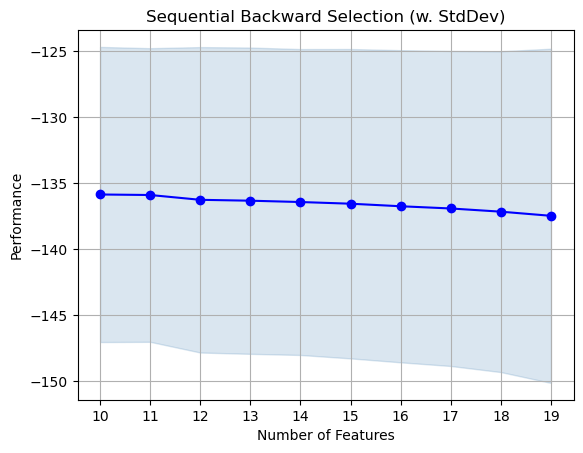

In [36]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

fig = plot_sfs(sfs_backward.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection (w. StdDev)')
plt.grid()
plt.show()

In [37]:
from sklearn.model_selection import RepeatedKFold, cross_val_score

X_train = X_train[selected_features_backward]
X_test = X_test[selected_features_backward]

repeatkf = RepeatedKFold(n_splits=5, n_repeats=10, random_state=156)

np.mean(cross_val_score(model, X_train, y_train, cv=repeatkf, n_jobs=-1))



0.5495945325516232

In [38]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print("Mean Absolute Error:", mean_absolute_error(y_test, predictions))
print("Mean Squared Error:", mean_squared_error(y_test, predictions))
print("r2 score:", r2_score(y_test, predictions))

Mean Absolute Error: 8.854918244989832
Mean Squared Error: 123.3853647856332
r2 score: 0.578371676573508
